# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Dados e arquivos da atividade: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

***Tratamento de Dados***

In [133]:
import pandas as pd

## Cancelamentos-compact é uma versão simplificada do formato do arquivo utilizado
tabela = pd.read_csv("cancelamentos.csv")

## Remover Coluna Inútil
tabela = tabela.drop(columns="CustomerID")
# Remover Linhas que contém informações nulas
tabela = tabela.dropna()

***Verificando Taxa de Cancelamento***

In [134]:
display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
1.0    499993
0.0    381666
Name: count, dtype: int64

cancelou
1.0    56.7%
0.0    43.3%
Name: proportion, dtype: object

### Verificando Taxa de Cancelamento por Contratos

In [135]:
## Total de pessoas por contrato
display(tabela["duracao_contrato"].value_counts())
display(tabela["duracao_contrato"].value_counts(normalize=True).map("{:.1%}".format))

display(tabela.groupby("duracao_contrato").mean(numeric_only=True).map("{:.2f}".format))

duracao_contrato
Annual       354395
Quarterly    353059
Monthly      174205
Name: count, dtype: int64

duracao_contrato
Annual       40.2%
Quarterly    40.0%
Monthly      19.8%
Name: proportion, dtype: object

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,,,
Annual,38.84,31.45,15.88,3.26,12.47,651.70,14.24,0.46
Monthly,41.55,30.54,15.50,4.99,15.01,550.62,15.48,1.00
Quarterly,38.83,31.42,15.89,3.27,12.46,651.43,14.23,0.46


Verificado que a taxa de cancelamento no contrato mensal é de 100%

### Verificando a taxa de cancelamento sem o contrato mensal

In [136]:
tabela = tabela[tabela["duracao_contrato"] != "Monthly"]
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
0.0    53.9%
1.0    46.1%
Name: proportion, dtype: object

Constatado uma diminuição de 10% no total de cancelamentos ao remover o contrato mensal

### Analisando Cancelamentos por Assinatura

In [137]:
display(tabela["assinatura"].value_counts(normalize=True))
display(tabela.groupby("assinatura").mean(numeric_only=True).map("{:.2f}".format))

## Informação não é substancial

assinatura
Standard    0.339648
Premium     0.338138
Basic       0.322215
Name: proportion, dtype: float64

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,,,
Basic,38.90,32.32,15.88,3.31,12.51,648.64,14.24,0.48
Premium,38.82,30.98,15.89,3.24,12.43,653.34,14.23,0.45
Standard,38.79,31.05,15.88,3.25,12.45,652.57,14.23,0.45


### Utilizando Gráficos para visualizar melhor

In [ ]:
import plotly.express as px

## Cria um gráfico de histograma com cores por cancelamento
for coluna in tabela.columns:
    print(f"Tabela cancelamentos por {coluna}")
    grafico = px.histogram(tabela, x=coluna, color="cancelou", width=600)
    grafico.show()


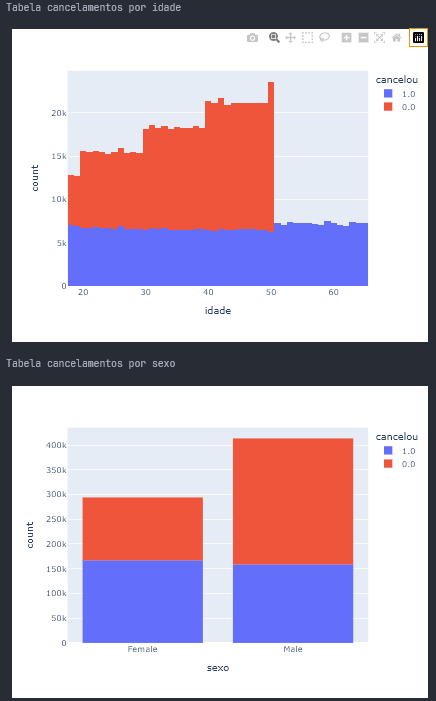 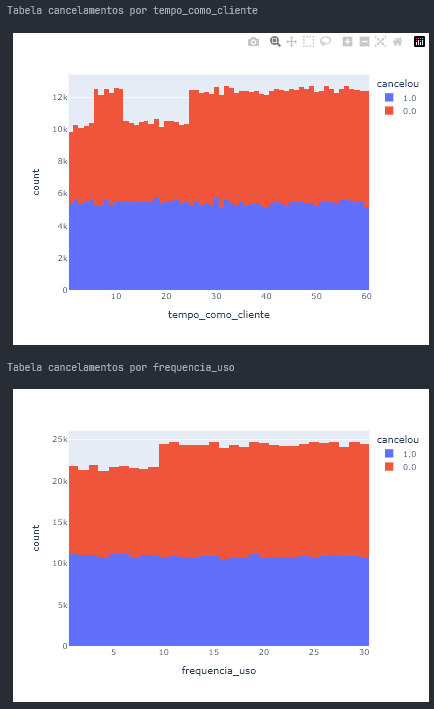 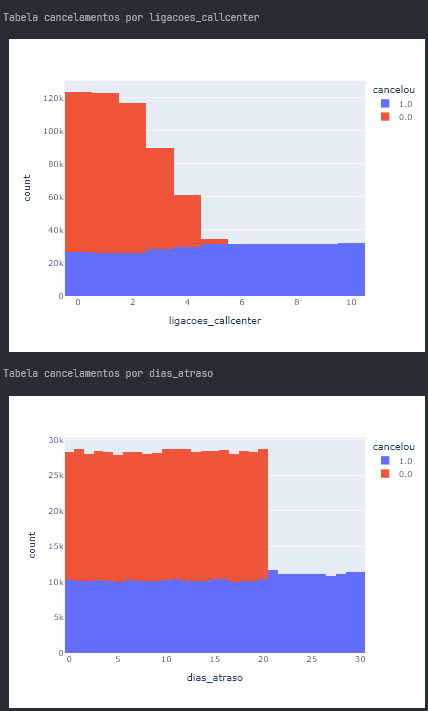 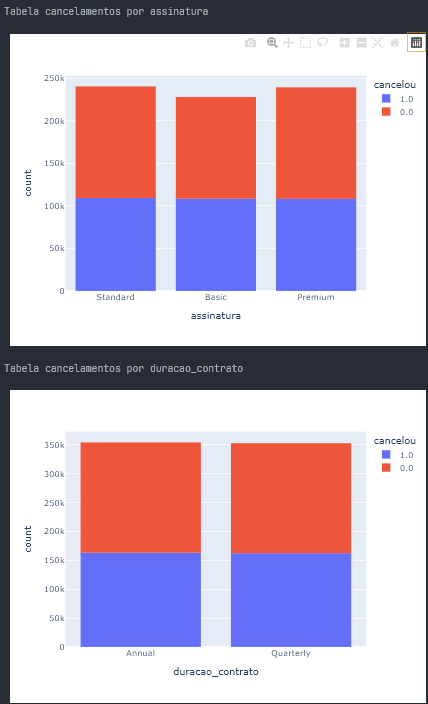 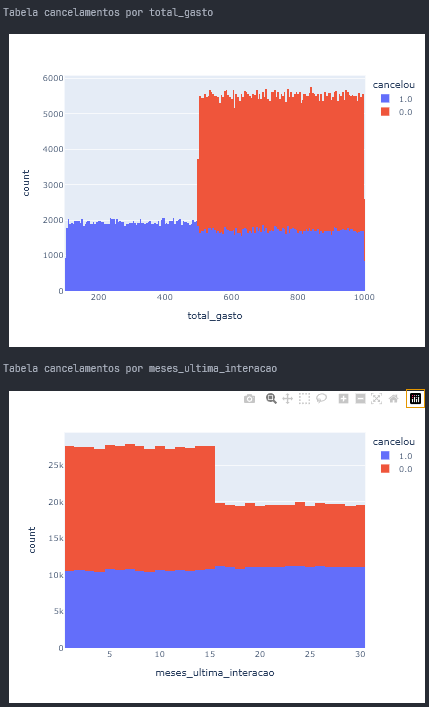 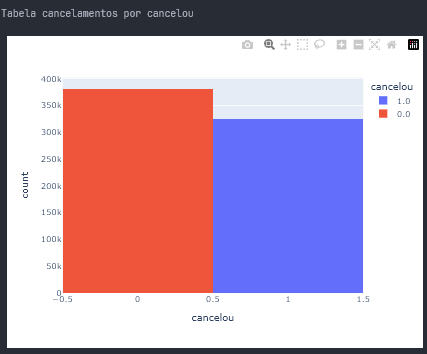

### Causas de Cancelamento

- Clientes no contrato mensal tendem a cancelar muito mais facilmente

- Clientes a partir de 50 anos

- Clientes com mais de 4 ligações ao CallCenter

- Clientes com mais de 20 dias de atraso no pagamento
  
***Como Resolver?***

- Incentivar o cliente a adquirir os contratos Anuais e Trimestrais com bons descontos
- Focar a publicidade do negócio para atrair clientes entre 20 e 50 anos
- Agilizar o resolução de problemas no call center. Caso o cliente ligue pela 3 vez, facilitar o contato com algum responsável que tenha mais autoridade na empresa para solucionar mais facilmente o problema do cliente. (Exemplo)
- Criar lembretes mais insistentes para clientes com atraso no pagamento. Exemplo: Notificação por email aos 5 dias de atraso; Ligação aos 10 dias... 

### Visualizar Possível Resultado

In [ ]:
import plotly.express as px

## Removendo pessoas com mais de 50 anos
tabela = tabela[tabela["idade"] <= 50]
tabela = tabela[tabela["ligacoes_callcenter"] <= 4]
tabela = tabela[tabela["dias_atraso"] <= 20]

## Cria um gráfico de histograma com cores por cancelamento
for coluna in tabela.columns:
    print(f"Tabela cancelamentos por {coluna}")
    grafico = px.histogram(tabela, x=coluna, color="cancelou", width=600)
    grafico.show()

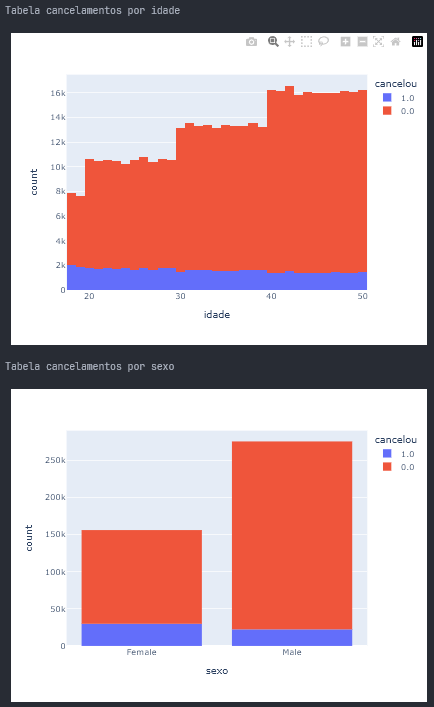 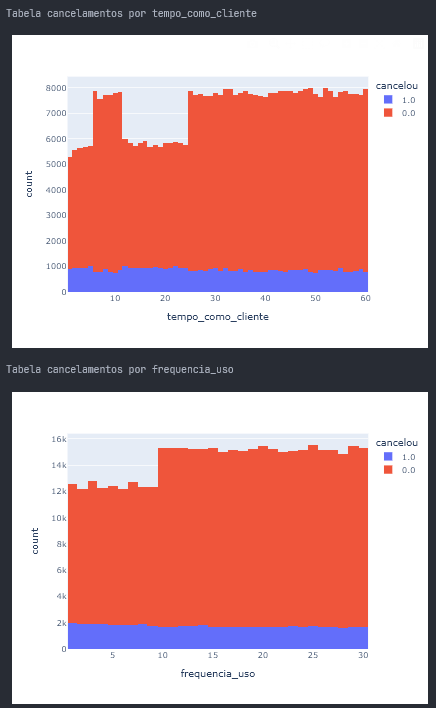 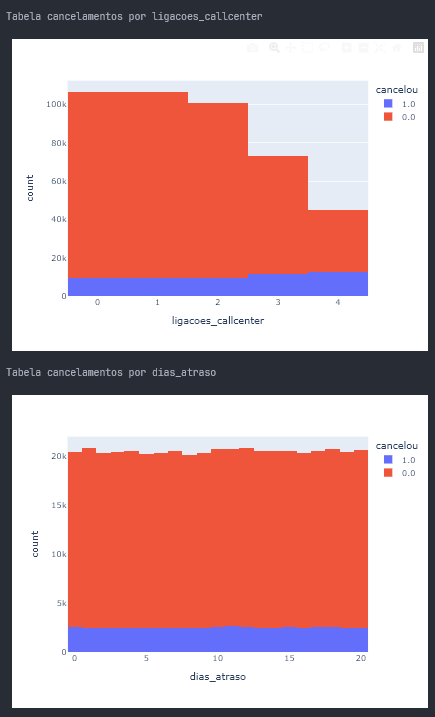 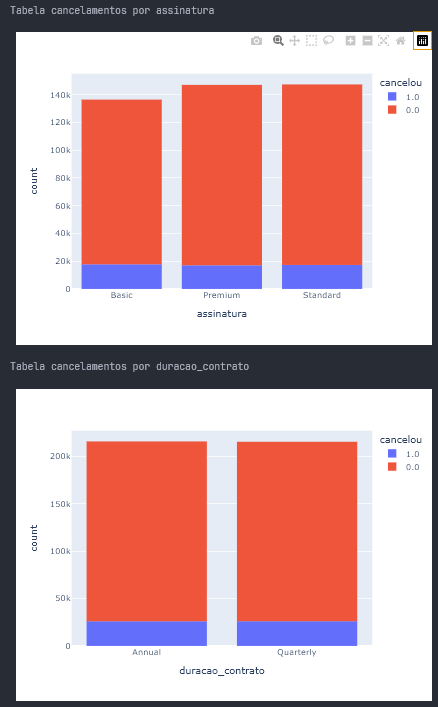 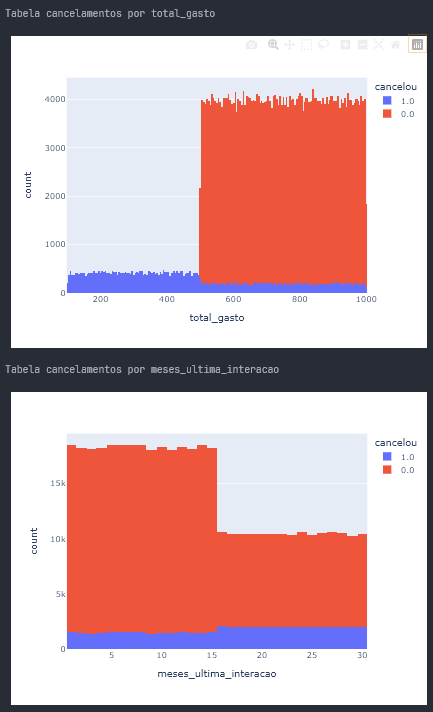 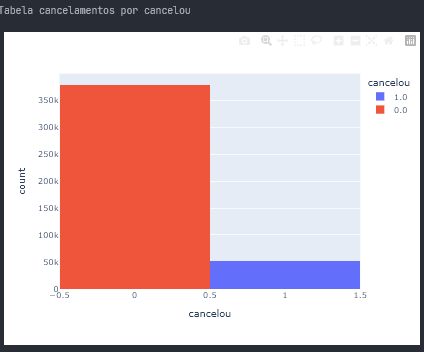

In [140]:
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
0.0    87.9%
1.0    12.1%
Name: proportion, dtype: object

#### Após remover as possíveis maiores causas de cancelamento, a taxa de cancelamento total desceu de ***56% para 12%!***